In [43]:
import geopandas
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [44]:
request = requests.get('https://r2.datahub.io/clvyjaryy0000la0cxieg4o8o/main/raw/data/countries.geojson')

In [45]:
gdf = geopandas.read_file(request.content)

In [47]:
gastos_publicos = pd.read_excel('imf_government_expenditure.xls')

In [48]:
gastos_publicos['Country'] = gastos_publicos['Country'].sort_values(ascending=True)

In [49]:
set(gastos_publicos['Country']).difference(gdf['name'])

{'Bahamas',
 "China, People's Republic of",
 'Czech Republic',
 "Côte d'Ivoire",
 'Eswatini',
 'Hong Kong SAR',
 'Korea, Republic of',
 'Kyrgyz Republic',
 'Micronesia, Fed. States of',
 'Republic of Congo',
 'Russian Federation',
 'Slovak Republic',
 'Tanzania',
 'Türkiye, Republic of',
 'United States'}

In [50]:
gdf['name'] = gdf['name'].replace({
    'The Bahamas': 'Bahamas',
    'China': "China, People's Republic of",
    'Czechia': 'Czech Republic',
    'Ivory Coast': "Côte d'Ivoire",
    'eSwatini': 'Eswatini',
    'Hong Kong S.A.R.': 'Hong Kong SAR',
    'South Korea': 'Korea, Republic of',
    'Turkey': 'Türkiye, Republic of',
    'United States of America': 'United States',
    'United Republic of Tanzania': 'Tanzania',
    'Slovakia': 'Slovak Republic',
    'Russia': 'Russian Federation',
    'Republic of the Congo': 'Republic of Congo',
    "Federated States of Micronesia": 'Micronesia, Fed. States of',
    'Kyrgyzstan': 'Kyrgyz Republic'
})

In [51]:
set(gastos_publicos['Country']).difference(gdf['name'])

set()

In [52]:
gdf = gdf.iloc[:, [0, 3]]

In [53]:
gdf = gdf.sort_values(by='name', ascending=True).reset_index(drop=True)

In [54]:
gdf = gdf[gdf['name'].isin(gastos_publicos['Country'].unique())].reset_index(drop=True)

In [55]:
gdf['Gastos públicos (% do PIB)'] = gastos_publicos['Percentage']

In [56]:
gdf

,name,geometry,Gastos públicos (% do PIB)
0,Albania,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",30.444901
1,Algeria,"POLYGON ((-4.82161 24.99506, -4.99519 25.10209...",32.699300
2,Angola,"MULTIPOLYGON (((13.0737 -4.63532, 13.06533 -4....",19.510293
3,Antigua and Barbuda,"MULTIPOLYGON (((-61.88362 17.04902, -61.87922 ...",20.692064
4,Argentina,"MULTIPOLYGON (((-67.1939 -22.82222, -67.14269 ...",37.714727
...,...,...,...
146,Uzbekistan,"MULTIPOLYGON (((71.78552 39.9897, 71.78976 39....",31.351001
147,Vanuatu,"MULTIPOLYGON (((169.84034 -20.1408, 169.86052 ...",43.399044
148,Venezuela,"MULTIPOLYGON (((-60.02098 8.55801, -59.9597 8....",15.110980
149,Vietnam,"MULTIPOLYGON (((107.52039 14.70458, 107.52225 ...",18.335303


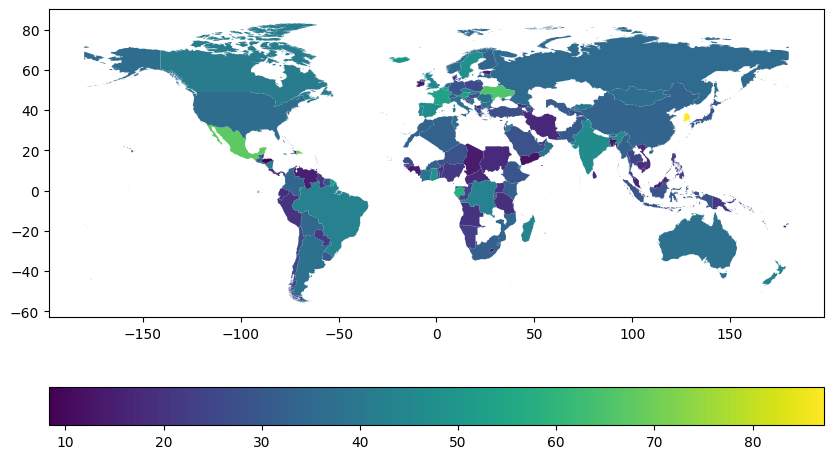

In [ ]:
gdf.plot(column='Gastos públicos (% do PIB)',
        cmap='viridis',
        legend=True,
        legend_kwds={
            'orientation': "horizontal"
        },
        figsize=(10, 6)
)

plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/mapa_coropleto_paises_gastospublicos.png', dpi=300, bbox_inches='tight')
plt.show()